# Using $tfidf$ to identify context-important words  

In this notebook we will go into the details of how to run $tfidf$ step by step in code. For the full background on this topic, please checkout the SandyEdge blog post here: <http://xxxx.com>.

But before we begin, let me first introduce the mathematical equation, which I proudly spent the weekend learning the LaTex code for:

$$ tfidf_{t,d} = tf_{t,d} \cdot \log \frac{N}{df_t} $$
<center>**_ where_ **<center>
$t$ = _term_
<br>
$d$ = _document_
<br>
$ tfidf_{t,d}$ = _term $t$ $tfidf$ score for document_ $d$
<br>
$ tf_{t,d}$ = _number of occurences of term $t$ in document $d$_
<br>
$ {df_t}$ = _number of documents containing term $t$_
<br>
$ N $ = _total number of documents_

So without further ado, lets begin 

In [30]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
os.chdir("C:\\Users\\user\\Dropbox\\Pet Project\\Blog\\TFIDF\\")

I'm going to use my own dataset which is based on Student essays. You can easily find other datasets and examples, in the wild but I'm using this as it is one of the better datasets for text mining due to its large signal over noise. 

In [31]:
#load the data 
train = pd.read_csv("training_set.tsv", header=0, delimiter="\t", quoting=3,encoding = 'latin_1')
train = train[train.essay_set == 1]

#do some checks
train.shape
train['essay'].iloc[0]

'"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there\'s a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it\'s a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the eco

------------------------------
If you read through the above, the only issue with highschool essay's is that its filled with spelling mistakes. Now lets get the dataset into the proper object, and then we can start cleaning the text so we can apply $tfidf$

Unlike the R version, Python has a very neat and quick way to transform the dataset straight into a DTM (document-term-matrix). DTM is basically a matrix of documents on rows and terms on columns. Its the native format that is required to also run SVD / LSI (Latent Semantic Indexing) and topic modelling 

In [32]:
# Create DTM of counts 
cvec = CountVectorizer()
cvec_counts = cvec.fit_transform(train['essay'])

# Check the dimensions of the DTM 
cvec_counts.shape  

(1783, 15735)

------------------------------
1,783 documents by 15,735 word vectors. Sounds about right. Can't say much about the 15k word vectors but 1,783 documents is definetly what we need. Note that the default parameter settings of CountVectorizer() will include 'lowercase application' and 'ignores punctuations'. Now lets find out what the word distribution is like:

In [33]:
 # sum up all the counts for the word vector
freq = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist() 
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'frequency': freq})

# lets print the top 20 most frequent term 
counts_df.sort_values(by='frequency', ascending=False).head(10)

,frequency,term
14246,22205,to
13989,22200,the
648,18613,and
15681,17907,you
2844,10646,computers
9771,10406,on
10286,10324,people
13983,9878,that
9697,9780,of
2836,9259,computer


------------------------------
Based on frequency counts, lots of stopwords and generic terms like "computers" are appearing. This is expected since we didn't do any stop words removal, or $tfidf$ for that matter. So in this part of the process, is essentially the Term Frequency (TF) component in $tfidf$. So now, lets apply the $tfidf$ full transfomation:

In [40]:
transformer = TfidfTransformer() 
transformed_weights = transformer.fit_transform(cvec_counts)  #this takes the previous Count Vector object above 

# Check the dimensions of the DTM 
transformed_weights.shape  

#lets check out how the results look like
print(transformed_weights) 

  (0, 3630)	0.0205795178957
  (0, 8375)	0.0692567747786
  (0, 9414)	0.0296724820614
  (0, 14086)	0.0888150263924
  (0, 4577)	0.0855372612395
  (0, 2844)	0.0313049145955
  (0, 6692)	0.0637103482304
  (0, 9771)	0.151937023131
  (0, 10286)	0.0466419753712
  (0, 833)	0.0154516111753
  (0, 6442)	0.0650269796243
  (0, 8137)	0.0855372612395
  (0, 12731)	0.0522323088082
  (0, 378)	0.0665549003141
  (0, 1304)	0.0796254467089
  (0, 14058)	0.0334191217792
  (0, 6259)	0.0374067800391
  (0, 14844)	0.195749236724
  (0, 14207)	0.0993557830735
  (0, 14246)	0.147571248637
  (0, 2313)	0.145155526491
  (0, 15454)	0.113009335539
  (0, 6028)	0.104703215001
  (0, 9397)	0.132086034922
  (0, 6798)	0.080617181976
  :	:
  (1782, 10225)	0.0754486130427
  (1782, 2121)	0.0849473257093
  (1782, 13986)	0.130740365821
  (1782, 6318)	0.116169766347
  (1782, 10744)	0.083226699468
  (1782, 10361)	0.0827601959427
  (1782, 8592)	0.0659777931142
  (1782, 8106)	0.076445214015
  (1782, 8604)	0.112969824335
  (1782, 13391)	0.

------------------------------
Noticed the numbers are now very different to the original cvec_counts above? Well this is because we've reweighted the DTM by $tfidf$ now. Or more specifically the words in each row is $tfidf$ weighted. For more detailed explanation of the formula and how it works, please read through the blog post on SandyEdge.

So lets find out which word has the highest $tfidf$ score. Because $tfidf$ for each word is different for each document (row), so what we'll do is take the average $tfidf$ score for each word across all 1,783 documents:

In [41]:
# To avoid taking the mean including zero, we'll pad it with Nulls. Not the most efficient but works for now 
transformed_weights[transformed_weights==0] = np.nan

# Now transform the objects to the object to the proper format and take the average $tfidf$ score. 
transformed_weights = pd.DataFrame(transformed_weights.todense())
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()

# Make a dataframe and check the statistics of the $tfidf$ score.
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df['weight'].describe()

C:\Users\User\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:214: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  ", try using != instead.", SparseEfficiencyWarning)
C:\Users\User\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


count    15735.000000
mean         0.099362
std          0.037964
min          0.020396
25%          0.079014
50%          0.091450
75%          0.108672
max          0.688265
Name: weight, dtype: float64

------------------------------
In practice, we usually remove any words with $tfidf$ score less than 0.1. However, depending on your data, one may have to adjust this cut-off slightly. Generally if you have really noisy dataset, you want to reduce this down further 

From the stat above, I can sufficiently conclude that we have a fairly noisy dataset (median at 50% $tfidf$ = 0.09). But not the end of the world. Lets have a look at what are the top 10 words with lowest $tfidf$ scores

In [42]:
weights_df.sort_values(by='weight', ascending=True).head(10)


,term,weight
3630,dear,0.020396
9550,num1,0.028875
10302,percent1,0.030898
2065,caps1,0.031495
9414,newspaper,0.032191
8382,location1,0.033617
5754,first,0.036204
2915,conclusion,0.036350
9555,num2,0.036507
9774,one,0.036938


------------------------------
Notice how it has captured not only stopwords, but also other non-useful words like "dear" and "newspaper", which is the default opening sentence for all the essays. Now lets have a look at the top 10 words 

In [43]:
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
4021,difrent,0.688265
2772,compiuters,0.662883
2831,computar,0.623923
7147,illeagle,0.584656
4818,engry,0.573289
10617,pol,0.571404
9310,nede,0.567567
13809,techknowlogy,0.563077
13191,srech,0.551029
2090,caps33,0.531776


------------------------------
Unlike the R version, there are less spares words appearing with high $tfidf$ scores. In fact, the highly sparse terms have low $tfidf$ score which is what we want. Lets check out some of these spelling mistakes to understand why its getting such a high $tfidf$ score:

In [38]:
counts_df.sort_values(by='term', ascending=1)
weights_df.sort_values(by='term', ascending=1)
combined = pd.concat([weights_df,counts_df['frequency']], axis=1)
combined.sort_values(by='weight', ascending=False).head(10)

,term,weight,frequency
4021,difrent,0.688265,4
2772,compiuters,0.662883,9
2831,computar,0.623923,10
7147,illeagle,0.584656,2
4818,engry,0.573289,5
10617,pol,0.571404,1
9310,nede,0.567567,2
13809,techknowlogy,0.563077,8
13191,srech,0.551029,3
2090,caps33,0.531776,10


------------------------------
Turns out these spelling mistake is pretty common amongst students and its confusing the model slightly. We could remove sparse terms, or use bigger dataset or apply spelling correction, all of which may help solve this issue

Let's plot the results 

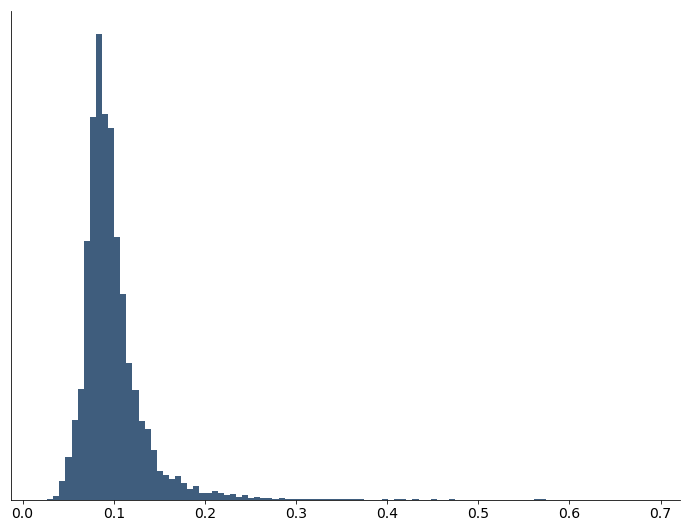

In [26]:
# setup the plotting parameters
plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.xticks(fontsize=14)  
plt.yticks(range(5000, 30001, 5000), fontsize=14)  

# Plot the histogram of the counts (should be a power-law dist?)
plt.hist(combined['weight'],  
         color="#3F5D7D", bins=100)  
plt.show()

------------------------------
Plotting the $tfidf$ weight shows a right skew, or in other words a large number of words have low $tfidf$ scores. This makes sense as we intentionally turned off the stopwords and sparewords removal function

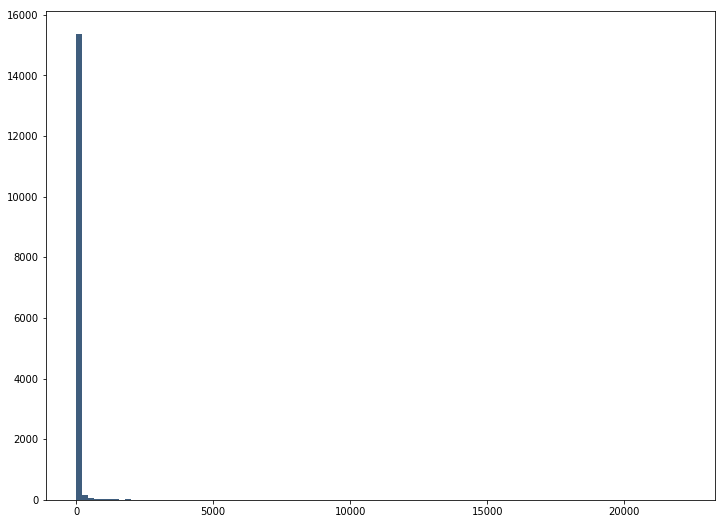

In [28]:
plt.figure(figsize=(12, 9))  
plt.hist(combined['frequency'],  
         color="#3F5D7D", bins=100)  
plt.show()

------------------------------
Plotting just the frequencies shows a power law distribution, which again makes sense as we intentionally turned off the stopwords and sparewords removal function. 